In [3]:
# LOCATION FOR MARCH-JUNE DATA:
# engine = create_engine("sqlite:////Users/lilygoldwasser/Desktop/mta_data.db")


#LOCATION FOR DEC DATA:
#engine = create_engine("sqlite:////Users/lilygoldwasser/Desktop/metis/mta_data.db")

In [2]:
import pandas as pd 
import seaborn as sns
import numpy as np 
import matplotlib.pyplot as plt 
%config InlineBackend.figure_formats = ['svg']  # or retina
%matplotlib inline

sns.set(context='notebook', 
    style='whitegrid', 
    font_scale=1.1)

import datetime
import calendar

In [4]:
from sqlalchemy import create_engine
from sqlalchemy import inspect

engine = create_engine("sqlite:////Users/lilygoldwasser/Desktop/mta_data.db")

insp = inspect(engine)
print(insp.get_table_names())
mta_data = pd.read_sql('SELECT * FROM mta_data;', engine)

mta_data.head()

['mta_data']


,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/20/2021,00:00:00,REGULAR,7547270,2575125
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/20/2021,04:00:00,REGULAR,7547275,2575125
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/20/2021,08:00:00,REGULAR,7547290,2575135
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/20/2021,12:00:00,REGULAR,7547327,2575183
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/20/2021,16:00:00,REGULAR,7547418,2575215


In [5]:
#SQL queries
min_date = pd.read_sql('SELECT MIN(DATE) FROM mta_data;', engine)
min_date

,MIN(DATE)
0,02/27/2021


In [6]:
max_date = pd.read_sql('SELECT MAX(DATE) FROM mta_data;', engine)
max_date

,MAX(DATE)
0,06/25/2021


In [278]:
#SQL queries
num_stations = pd.read_sql('SELECT COUNT(DISTINCT STATION) as num_stations FROM mta_data;', engine)
num_stations

,num_stations
0,379


In [279]:
#SQL queries
turnstile = pd.read_sql('SELECT "C/A", "UNIT","SCP","STATION" FROM mta_data WHERE STATION LIKE "%ST-PORT%";', engine)
turnstile.head()

,C/A,UNIT,SCP,STATION
0,N060,R010,01-00-00,42 ST-PORT AUTH
1,N060,R010,01-00-00,42 ST-PORT AUTH
2,N060,R010,01-00-00,42 ST-PORT AUTH
3,N060,R010,01-00-00,42 ST-PORT AUTH
4,N060,R010,01-00-00,42 ST-PORT AUTH


In [280]:
#SQL queries: GROUP BY turnstile
group_turnstile = pd.read_sql('SELECT * FROM mta_data GROUP BY  "C/A", "UNIT","SCP","STATION";', engine)
group_turnstile.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/20/2021,00:00:00,REGULAR,7547270,2575125
1,A002,R051,02-00-01,59 ST,NQR456W,BMT,03/20/2021,00:00:00,REGULAR,6683743,1519120
2,A002,R051,02-03-00,59 ST,NQR456W,BMT,03/20/2021,00:00:00,REGULAR,1419697,5360167
3,A002,R051,02-03-01,59 ST,NQR456W,BMT,03/20/2021,00:00:00,REGULAR,1564524,2438101
4,A002,R051,02-03-02,59 ST,NQR456W,BMT,03/20/2021,00:00:00,REGULAR,6640923,8868855


In [281]:
station_group = pd.read_sql('SELECT STATION, SUM(ENTRIES), SUM(EXITS) FROM mta_data GROUP BY STATION ORDER BY SUM(ENTRIES) DESC LIMIT 10', engine)
station_group.head()

,STATION,SUM(ENTRIES),SUM(EXITS)
0,42 ST-PORT AUTH,7900683187964,6536033565814
1,DEKALB AV,6832785512025,4574608465042
2,125 ST,6497864602826,4701066602662
3,23 ST,6018755640116,6062524119050
4,161/YANKEE STAD,5287456924048,5084153181209


In [282]:
line_count_times_sq = pd.read_sql('SELECT COUNT(DISTINCT LINENAME) AS COUNT_LINES,STATION FROM mta_data WHERE STATION LIKE "TIMES%";',engine)
line_count_times_sq.head()

,COUNT_LINES,STATION
0,3,TIMES SQ-42 ST


In [283]:
ca_count = pd.read_sql('SELECT COUNT(DISTINCT "C/A") as CA_count, STATION FROM mta_data WHERE STATION in ("34 ST-HERALD SQ", "GRD CNTRL-42 ST", "FLUSHING-MAIN", "42 ST-PORT AUTH", "34 ST-PENN STA") GROUP BY STATION HAVING CA_count > 1 ORDER BY 1 DESC;', engine)
ca_count

,CA_count,STATION
0,13,34 ST-PENN STA
1,8,GRD CNTRL-42 ST
2,5,42 ST-PORT AUTH
3,5,34 ST-HERALD SQ
4,2,FLUSHING-MAIN


In [7]:
mta_data.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES', 'EXITS'],
      dtype='object')

In [8]:
#standardize data: remove whitespace, lowercase,create datetime object 
mta_data.columns = [column.strip().lower().replace('/','_') for column in mta_data]
mta_data.head()

,c_a,unit,scp,station,linename,division,date,time,desc,entries,exits
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/20/2021,00:00:00,REGULAR,7547270,2575125
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/20/2021,04:00:00,REGULAR,7547275,2575125
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/20/2021,08:00:00,REGULAR,7547290,2575135
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/20/2021,12:00:00,REGULAR,7547327,2575183
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/20/2021,16:00:00,REGULAR,7547418,2575215


In [9]:
mta_data['datetime'] = pd.to_datetime(mta_data.date + " " + mta_data.time,format="%m/%d/%Y %H:%M:%S")

In [10]:
#add DOW column: lambda fxn takes row, finds datetime, apply fxn weekday; axis 1 = row
mta_data['day_of_week'] = mta_data.apply((lambda row: row.datetime.weekday()),axis=1)

#ALT: mta_data["day_of_week"] = mta_data.datetime.dt.day_of_week
mta_data.columns

Index(['c_a', 'unit', 'scp', 'station', 'linename', 'division', 'date', 'time',
       'desc', 'entries', 'exits', 'datetime', 'day_of_week'],
      dtype='object')

In [288]:
mta_data.dtypes

c_a                    object
unit                   object
scp                    object
station                object
linename               object
division               object
date                   object
time                   object
desc                   object
entries                 int64
exits                   int64
datetime       datetime64[ns]
day_of_week             int64
dtype: object

In [11]:
mta_data["hour"] = mta_data["datetime"].dt.strftime("%H")

In [12]:
import calendar
import datetime

##change columns "time" and "date" and "datetime" to datetime datatype
mta_data["datetime"] = pd.to_datetime(mta_data['datetime'])
mta_data["time"] = pd.to_datetime(mta_data['time'])
mta_data["date"] = pd.to_datetime(mta_data['date'])
mta_data.dtypes

c_a                    object
unit                   object
scp                    object
station                object
linename               object
division               object
date           datetime64[ns]
time           datetime64[ns]
desc                   object
entries                 int64
exits                   int64
datetime       datetime64[ns]
day_of_week             int64
hour                   object
dtype: object

In [13]:
#filters so just weekdays and after-work hours (4-8pm)
#without mta_data at beginning, just get boolean conditions (T/F)

mta_data = mta_data[(mta_data["day_of_week"]<5) & (mta_data["hour"] < "21") & (mta_data["hour"]>"15")]
mta_data.hour.max()

'20'

In [14]:
mta_data.hour.min()

'16'

In [16]:
#how many value counts per day (entries?)
mta_data.date.value_counts().sort_index().head()

2021-03-01    13852
2021-03-02    13838
2021-03-03    13858
2021-03-04    14072
2021-03-05    13946
Name: date, dtype: int64

In [17]:
#cleaning up data: REMOVE DUPLICATE ENTRIES - isolate specific turnstile w/ boolean series mask

mask = ((mta_data["c_a"] == "A002") &
        (mta_data["unit"] == "R051") & 
        (mta_data["scp"] == "02-00-00") & 
        (mta_data["station"] == "59 ST"))

mta_data[mask].head()

,c_a,unit,scp,station,linename,division,date,time,desc,entries,exits,datetime,day_of_week,hour
16,A002,R051,02-00-00,59 ST,NQR456W,BMT,2021-03-22,2022-01-13 16:00:00,REGULAR,7548138,2575549,2021-03-22 16:00:00,0,16
17,A002,R051,02-00-00,59 ST,NQR456W,BMT,2021-03-22,2022-01-13 20:00:00,REGULAR,7548375,2575573,2021-03-22 20:00:00,0,20
22,A002,R051,02-00-00,59 ST,NQR456W,BMT,2021-03-23,2022-01-13 16:00:00,REGULAR,7548717,2575826,2021-03-23 16:00:00,1,16
23,A002,R051,02-00-00,59 ST,NQR456W,BMT,2021-03-23,2022-01-13 20:00:00,REGULAR,7548985,2575849,2021-03-23 20:00:00,1,20
28,A002,R051,02-00-00,59 ST,NQR456W,BMT,2021-03-24,2022-01-13 16:00:00,REGULAR,7549286,2576101,2021-03-24 16:00:00,2,16


In [18]:
#sanity check to verify that c_a, unit, scp, station, datetime are unique

(mta_data
 .groupby(["c_a", "unit", "scp", "station", "date"])
 .exits.count()  # entries per turnstile per datetime 
 .reset_index()
 .sort_values("exits", ascending=False)).head(5)

#4 entries for turnstile = duplicates

,c_a,unit,scp,station,date,exits
104520,N049,R084,01-03-02,59 ST COLUMBUS,2021-04-12,34
105030,N049,R084,01-06-02,59 ST COLUMBUS,2021-04-12,34
104690,N049,R084,01-05-00,59 ST COLUMBUS,2021-04-12,34
104010,N049,R084,01-00-02,59 ST COLUMBUS,2021-04-12,34
103840,N049,R084,01-00-00,59 ST COLUMBUS,2021-04-12,34


In [19]:
# Get rid of the duplicate entries
mta_data.sort_values(["c_a", "unit", "scp", "station", "date"], 
                          inplace=True, ascending=False)
mta_data.drop_duplicates(subset=["c_a", "unit", "scp", "station", "date"], inplace=True)

In [20]:
#sanity check to make sure ca unit scp station are unique
(mta_data
 .groupby(["c_a", "unit", "scp", "station", "date"])
 .entries.count()
 .reset_index()
 .sort_values("entries", ascending=False)).head(5) #descending

#nice! now just 1 exit

,c_a,unit,scp,station,date,entries
0,A002,R051,02-00-00,59 ST,2021-03-01,1
282555,R138,R293,00-02-05,34 ST-PENN STA,2021-06-03,1
282565,R138,R293,00-02-05,34 ST-PENN STA,2021-06-17,1
282564,R138,R293,00-02-05,34 ST-PENN STA,2021-06-16,1
282563,R138,R293,00-02-05,34 ST-PENN STA,2021-06-15,1


In [21]:
mta_data.columns

Index(['c_a', 'unit', 'scp', 'station', 'linename', 'division', 'date', 'time',
       'desc', 'entries', 'exits', 'datetime', 'day_of_week', 'hour'],
      dtype='object')

In [22]:
#GROUP turnstiles by entries/exits
turnstiles_daily_entries = (mta_data.groupby(["c_a", "unit", "scp", "station", "date"], as_index=False).entries.first())
turnstiles_daily_entries.head()

,c_a,unit,scp,station,date,entries
0,A002,R051,02-00-00,59 ST,2021-03-01,7538294
1,A002,R051,02-00-00,59 ST,2021-03-02,7538821
2,A002,R051,02-00-00,59 ST,2021-03-03,7539390
3,A002,R051,02-00-00,59 ST,2021-03-04,7539906
4,A002,R051,02-00-00,59 ST,2021-03-05,7540486


In [23]:
#daily entries: subtract previous entries from entries (index 1 - index 0) and iterate through rows
#new columns: "prev_date","prev_entries", shift by 1

turnstiles_daily_entries[["prev_date", "prev_entries"]] = (turnstiles_daily_entries
                                           .groupby(["c_a", "unit", "scp", "station"])[["date", "entries"]]
                                           .shift(1))
# alt: lambda ("for every row")
# turnstiles_daily[["PREV_DATE", "PREV_ENTRIES"]] = (turnstiles_daily
#                                                    .groupby(["c_a", "unit", "scp", "station"])[["date_time", "entries"]]
#                                                        .apply(lambda grp: grp.shift(1)))

turnstiles_daily_entries.head()


,c_a,unit,scp,station,date,entries,prev_date,prev_entries
0,A002,R051,02-00-00,59 ST,2021-03-01,7538294,NaT,NaN
1,A002,R051,02-00-00,59 ST,2021-03-02,7538821,2021-03-01,7538294.0
2,A002,R051,02-00-00,59 ST,2021-03-03,7539390,2021-03-02,7538821.0
3,A002,R051,02-00-00,59 ST,2021-03-04,7539906,2021-03-03,7539390.0
4,A002,R051,02-00-00,59 ST,2021-03-05,7540486,2021-03-04,7539906.0


In [24]:
# Drop the rows for the earliest date in the df
turnstiles_daily_entries.dropna(subset=["prev_date"], axis=0, inplace=True)

In [25]:
#we have some negative values. some values are too big. 
(turnstiles_daily_entries['entries']-turnstiles_daily_entries['prev_entries']).describe()
#negative mean.

count    4.188160e+05
mean    -3.733008e+03
std      6.857360e+06
min     -1.604323e+09
25%      9.900000e+01
50%      3.080000e+02
75%      6.190000e+02
max      2.139011e+09
dtype: float64

In [26]:
#how many rows are backwards?
turnstiles_daily_entries[turnstiles_daily_entries["entries"]<turnstiles_daily_entries["prev_entries"]].shape

(4012, 8)

In [27]:
turnstiles_daily_entries[turnstiles_daily_entries["entries"]<turnstiles_daily_entries["prev_entries"]].head()

,c_a,unit,scp,station,date,entries,prev_date,prev_entries
355,A002,R051,02-03-02,59 ST,2021-03-22,22,2021-03-19,6640662.0
3315,A011,R080,01-03-00,57 ST-7 AV,2021-03-02,885619864,2021-03-01,885620060.0
3316,A011,R080,01-03-00,57 ST-7 AV,2021-03-03,885619673,2021-03-02,885619864.0
3317,A011,R080,01-03-00,57 ST-7 AV,2021-03-04,885619452,2021-03-03,885619673.0
3318,A011,R080,01-03-00,57 ST-7 AV,2021-03-05,885619236,2021-03-04,885619452.0


In [28]:
(turnstiles_daily_entries["entries"] - turnstiles_daily_entries["prev_entries"]).describe()

count    4.188160e+05
mean    -3.733008e+03
std      6.857360e+06
min     -1.604323e+09
25%      9.900000e+01
50%      3.080000e+02
75%      6.190000e+02
max      2.139011e+09
dtype: float64

In [29]:
#check to see why reverse entries
mask = ((turnstiles_daily_entries["c_a"] == "A011") & 
(turnstiles_daily_entries["unit"] == "R080") & 
(turnstiles_daily_entries["scp"] == "01-00-00") & 
(turnstiles_daily_entries["station"] == "57 ST-7 AV") &
(turnstiles_daily_entries["date"].dt.date == datetime.date(2016, 8, 27)))

In [30]:
#lets see how many stations have this problem
turnstiles_daily_entries[turnstiles_daily_entries["entries"]<turnstiles_daily_entries["prev_entries"]].groupby(["c_a", "unit", "scp", "station"]).size()

c_a    unit  scp       station        
A002   R051  02-03-02  59 ST               1
A011   R080  01-03-00  57 ST-7 AV         84
             01-03-03  57 ST-7 AV          1
             01-03-04  57 ST-7 AV          1
A013   R081  01-06-01  49 ST               1
                                          ..
R622   R123  00-00-00  FRANKLIN AV        84
R624   R124  00-00-02  KINGSTON AV         1
R730   R431  00-00-04  EASTCHSTER/DYRE    84
S101   R070  00-00-04  ST. GEORGE          1
TRAM2  R469  00-05-00  RIT-ROOSEVELT       1
Length: 249, dtype: int64

In [31]:
def get_daily_counts(row, max_counter):
    counter = row["entries"] - row["prev_entries"]
    
    if counter < 0:
        counter = -counter  # adjust for "reverse" counter
        
    if counter > max_counter:
        # Maybe counter was reset, so it may make sense to take the minimum
        # Set count to zero as different counters have different cycle limits
        
        print(f'entries: {row["entries"]} <-- {row["prev_entries"]}')
        counter = min(row["entries"], row["prev_entries"])
        
    if counter > max_counter:
        # If we still get a counter that is too big, set to zero
        return 0
    
    return counter

turnstiles_daily_entries["daily_entries"] = turnstiles_daily_entries.apply(get_daily_counts, axis=1, max_counter=10000)


entries: 22 <-- 6640662.0
entries: 27 <-- 154666.0
entries: 3082 <-- 1390173.0
entries: 259 <-- 479760.0
entries: 141 <-- 4340668.0
entries: 1085 <-- 11715665.0
entries: 1848 <-- 18396046.0
entries: 262161 <-- 337874.0
entries: 2323 <-- 986357.0
entries: 148 <-- 13073.0
entries: 262144 <-- 1.0
entries: 716 <-- 30631.0
entries: 63 <-- 1028362.0
entries: 78 <-- 765803.0
entries: 10 <-- 247805.0
entries: 26 <-- 55915.0
entries: 25 <-- 1399970.0
entries: 183 <-- 756269765.0
entries: 262152 <-- 553649986.0
entries: 25 <-- 262152.0
entries: 262152 <-- 229572623.0
entries: 0 <-- 5309746.0
entries: 262145 <-- 568.0
entries: 68 <-- 1640798.0
entries: 524289 <-- 127.0
entries: 458752 <-- 24.0
entries: 262144 <-- 0.0
entries: 262227 <-- 32088.0
entries: 262221 <-- 279069.0
entries: 589827 <-- 953.0
entries: 62 <-- 2651063.0
entries: 393223 <-- 459431.0
entries: 387 <-- 17275559.0
entries: 422 <-- 863496.0
entries: 262144 <-- 0.0
entries: 84 <-- 365946.0
entries: 4 <-- 262148.0
entries: 262154 <--

In [33]:
#for each ca/unit/station combo for each day, sum counts from each turnstile belonging to that combo
ca_unit_station_daily_entries = turnstiles_daily_entries.groupby(["c_a", "unit", "station", "date"])[['daily_entries']].sum().reset_index()
ca_unit_station_daily_entries.head()

,c_a,unit,station,date,daily_entries
0,A002,R051,59 ST,2021-03-02,4441.0
1,A002,R051,59 ST,2021-03-03,4507.0
2,A002,R051,59 ST,2021-03-04,4494.0
3,A002,R051,59 ST,2021-03-05,4591.0
4,A002,R051,59 ST,2021-03-08,9253.0


In [34]:
turnstiles_daily_entries.describe()

,entries,prev_entries,daily_entries
count,4.188160e+05,4.188160e+05,418816.000000
mean,4.181194e+07,4.181567e+07,454.444312
std,2.183036e+08,2.183021e+08,511.150468
min,0.000000e+00,0.000000e+00,0.000000
25%,2.144748e+05,2.144840e+05,106.000000
50%,1.429276e+06,1.430402e+06,315.000000
75%,6.057240e+06,6.058332e+06,627.000000
max,2.147432e+09,2.147432e+09,9626.000000


In [35]:
#busiest turnstiles
turnstiles_daily_exits = (mta_data.groupby(["c_a", "unit", "scp", "station", "date"], as_index=False).exits.max())
turnstiles_daily_exits.head()

,c_a,unit,scp,station,date,exits
0,A002,R051,02-00-00,59 ST,2021-03-01,2570952
1,A002,R051,02-00-00,59 ST,2021-03-02,2571195
2,A002,R051,02-00-00,59 ST,2021-03-03,2571459
3,A002,R051,02-00-00,59 ST,2021-03-04,2571734
4,A002,R051,02-00-00,59 ST,2021-03-05,2572012


In [36]:
turnstiles_daily_exits["day_of_week"]=turnstiles_daily_exits["date"].dt.dayofweek
turnstiles_daily_exits.head(5)

,c_a,unit,scp,station,date,exits,day_of_week
0,A002,R051,02-00-00,59 ST,2021-03-01,2570952,0
1,A002,R051,02-00-00,59 ST,2021-03-02,2571195,1
2,A002,R051,02-00-00,59 ST,2021-03-03,2571459,2
3,A002,R051,02-00-00,59 ST,2021-03-04,2571734,3
4,A002,R051,02-00-00,59 ST,2021-03-05,2572012,4


In [38]:
turnstiles_daily_exits[["prev_date", "prev_exit"]] = (turnstiles_daily_exits
                                           .groupby(["c_a", "unit", "scp", "station"])[["date", "exits"]]
                                           .shift(1))
turnstiles_daily_exits.head()

,c_a,unit,scp,station,date,exits,day_of_week,prev_date,prev_exit
0,A002,R051,02-00-00,59 ST,2021-03-01,2570952,0,NaT,NaN
1,A002,R051,02-00-00,59 ST,2021-03-02,2571195,1,2021-03-01,2570952.0
2,A002,R051,02-00-00,59 ST,2021-03-03,2571459,2,2021-03-02,2571195.0
3,A002,R051,02-00-00,59 ST,2021-03-04,2571734,3,2021-03-03,2571459.0
4,A002,R051,02-00-00,59 ST,2021-03-05,2572012,4,2021-03-04,2571734.0


In [39]:
#drop rows for earliest exit
turnstiles_daily_exits.dropna(subset=["prev_date"], axis=0, inplace=True)

In [40]:
def get_daily_counts(row, max_counter):
    counter = row["exits"] - row["prev_exit"]
    
    if counter < 0:
        counter = -counter  # adjust for "reverse" counter
        
    if counter > max_counter:
        # Maybe counter was reset, so it may make sense to take the minimum
#         print(f'exits: {row["EXITS"]} <-- {row["PREV_EXIT"]}')
        
        counter = min(row["exits"], row["prev_exit"])
        
    if counter > max_counter:
        # If we still get a counter that is too big, set to zero
        return 0
    
    return counter

turnstiles_daily_exits["daily_exits"] = turnstiles_daily_exits.apply(get_daily_counts, axis=1, max_counter=10000)

turnstiles_daily_exits.head()

,c_a,unit,scp,station,date,exits,day_of_week,prev_date,prev_exit,daily_exits
1,A002,R051,02-00-00,59 ST,2021-03-02,2571195,1,2021-03-01,2570952.0,243.0
2,A002,R051,02-00-00,59 ST,2021-03-03,2571459,2,2021-03-02,2571195.0,264.0
3,A002,R051,02-00-00,59 ST,2021-03-04,2571734,3,2021-03-03,2571459.0,275.0
4,A002,R051,02-00-00,59 ST,2021-03-05,2572012,4,2021-03-04,2571734.0,278.0
5,A002,R051,02-00-00,59 ST,2021-03-08,2572522,0,2021-03-05,2572012.0,510.0


In [41]:
turnstiles_daily_exits.describe()

,exits,day_of_week,prev_exit,daily_exits
count,4.188160e+05,418816.000000,4.188160e+05,418816.000000
mean,3.360378e+07,2.023428,3.360632e+07,497.689355
std,1.932215e+08,1.405373,1.932292e+08,653.732306
min,0.000000e+00,0.000000,0.000000e+00,0.000000
25%,9.216475e+04,1.000000,9.209975e+04,91.000000
50%,8.572530e+05,2.000000,8.575685e+05,288.000000
75%,3.986460e+06,3.000000,3.987509e+06,658.000000
max,2.123007e+09,4.000000,2.123008e+09,9989.000000


In [42]:
turnstiles_daily_entries.describe()

,entries,prev_entries,daily_entries
count,4.188160e+05,4.188160e+05,418816.000000
mean,4.181194e+07,4.181567e+07,454.444312
std,2.183036e+08,2.183021e+08,511.150468
min,0.000000e+00,0.000000e+00,0.000000
25%,2.144748e+05,2.144840e+05,106.000000
50%,1.429276e+06,1.430402e+06,315.000000
75%,6.057240e+06,6.058332e+06,627.000000
max,2.147432e+09,2.147432e+09,9626.000000


In [43]:
import matplotlib.pyplot as plt

In [44]:
#busines turnstiles for exits (M-F)
ca_unit_station_daily_exits = turnstiles_daily_exits.groupby(["c_a", "unit", "station", "date"])[['daily_exits']].sum().reset_index()
ca_unit_station_daily_exits.sort_values("daily_exits",ascending=False)
ca_unit_station_daily_exits.head()

,c_a,unit,station,date,daily_exits
0,A002,R051,59 ST,2021-03-02,3550.0
1,A002,R051,59 ST,2021-03-03,3778.0
2,A002,R051,59 ST,2021-03-04,3615.0
3,A002,R051,59 ST,2021-03-05,3666.0
4,A002,R051,59 ST,2021-03-08,7289.0


In [45]:
#daily time series for each station: add up daily entries for all turnstiles in each station
#M-F, 
station_daily_entries = turnstiles_daily_entries.groupby(["station", "date"])[['daily_entries']].sum().reset_index().sort_values("daily_entries",ascending=False)
station_daily_entries

,station,date,daily_entries
5200,34 ST-PENN STA,2021-06-21,118204.0
5195,34 ST-PENN STA,2021-06-14,107303.0
5190,34 ST-PENN STA,2021-06-07,106341.0
5180,34 ST-PENN STA,2021-05-24,99278.0
5175,34 ST-PENN STA,2021-05-17,94298.0
...,...,...,...
25959,ORCHARD BEACH,2021-06-23,0.0
25958,ORCHARD BEACH,2021-06-22,0.0
25956,ORCHARD BEACH,2021-06-18,0.0
25955,ORCHARD BEACH,2021-06-17,0.0


In [46]:
#daily EXITS perday of week for each station: 
station_daily_exits = turnstiles_daily_exits.groupby(["station", "date"])[['daily_exits']].sum().reset_index().sort_values("daily_exits",ascending=False)
station_daily_exits

,station,date,daily_exits
5200,34 ST-PENN STA,2021-06-21,159691.0
5190,34 ST-PENN STA,2021-06-07,143533.0
5195,34 ST-PENN STA,2021-06-14,138150.0
5180,34 ST-PENN STA,2021-05-24,136307.0
5032,34 ST-HERALD SQ,2021-06-21,127250.0
...,...,...,...
29728,TOMPKINSVILLE,2021-06-09,0.0
28894,ST. GEORGE,2021-06-17,0.0
29726,TOMPKINSVILLE,2021-06-07,0.0
29725,TOMPKINSVILLE,2021-06-04,0.0


In [47]:
#TOP 20 BUSIEST DAYS
station_traffic_each_day = station_daily_entries.merge(station_daily_exits, on = ["station","date"])
station_traffic_each_day["traffic"] = station_traffic_each_day["daily_entries"]+station_traffic_each_day["daily_exits"]
top_station_traffic_day = station_traffic_each_day.sort_values("traffic",ascending=False).head(20)
top_station_traffic_day

,station,date,daily_entries,daily_exits,traffic
0,34 ST-PENN STA,2021-06-21,118204.0,159691.0,277895.0
2,34 ST-PENN STA,2021-06-07,106341.0,143533.0,249874.0
1,34 ST-PENN STA,2021-06-14,107303.0,138150.0,245453.0
3,34 ST-PENN STA,2021-05-24,99278.0,136307.0,235585.0
4,34 ST-PENN STA,2021-05-17,94298.0,126986.0,221284.0
5,34 ST-HERALD SQ,2021-06-21,91729.0,127250.0,218979.0
6,34 ST-HERALD SQ,2021-06-14,89315.0,121045.0,210360.0
7,34 ST-PENN STA,2021-05-10,87853.0,121101.0,208954.0
9,34 ST-PENN STA,2021-04-26,83817.0,117834.0,201651.0
10,34 ST-PENN STA,2021-04-19,83793.0,117643.0,201436.0


In [48]:
station_total_exits = station_daily_exits.groupby(["station"])[['daily_exits']].sum().reset_index().sort_values("daily_exits",ascending=False).head(10)
station_total_exits

,station,daily_exits
61,34 ST-PENN STA,5419934.0
59,34 ST-HERALD SQ,4293549.0
110,86 ST,3983162.0
233,GRD CNTRL-42 ST,3937730.0
14,14 ST-UNION SQ,3744737.0
9,125 ST,3656050.0
68,42 ST-PORT AUTH,3374658.0
46,23 ST,3167796.0
353,TIMES SQ-42 ST,2841092.0
226,FULTON ST,2836508.0


In [49]:
import matplotlib.pyplot as plt

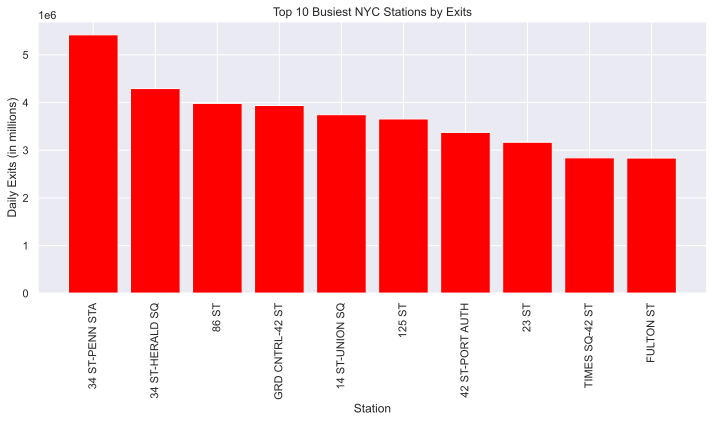

<Figure size 864x360 with 0 Axes>

In [105]:
#STATION TOTAL ENTRIES
#PLOT THIS RN
plt.bar(station_total_exits.station, station_total_exits.daily_exits, color='red')
plt.xlabel("Station");
plt.ylabel("Daily Exits (in millions)");
plt.title('Top 10 Busiest NYC Stations by Exits');
plt.xticks(rotation=90);
plt.show() 
plt.savefig('10_busiest_stations_exits.png', bbox_inches='tight', dpi=200, facecolor = 'w');

In [51]:
station_total_entries = station_daily_entries.groupby(["station"])[['daily_entries']].sum().reset_index().sort_values("daily_entries",ascending=False).head(10)
station_total_entries

,station,daily_entries
61,34 ST-PENN STA,4069796.0
59,34 ST-HERALD SQ,3329221.0
110,86 ST,3135189.0
9,125 ST,2944337.0
233,GRD CNTRL-42 ST,2900207.0
46,23 ST,2846817.0
68,42 ST-PORT AUTH,2843336.0
14,14 ST-UNION SQ,2798950.0
217,FLUSHING-MAIN,2422832.0
115,96 ST,2306684.0


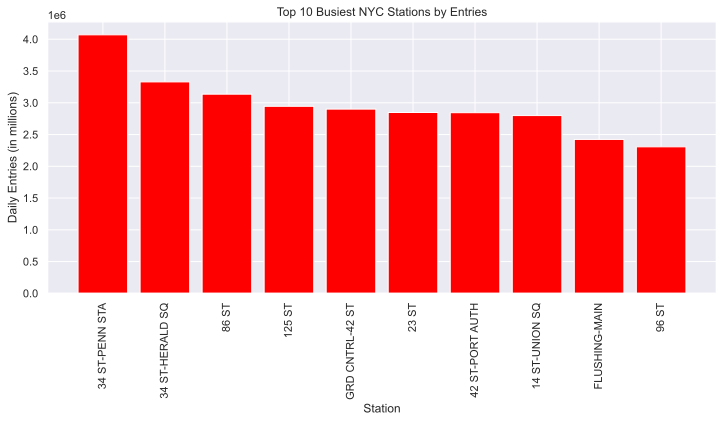

<Figure size 864x360 with 0 Axes>

In [108]:
#STATION TOTAL ENTRIES
#PLOT THIS RN
plt.bar(station_total_entries.station, station_total_entries.daily_entries, color='red')
plt.xlabel("Station");
plt.ylabel("Daily Entries (in millions)");
plt.title('Top 10 Busiest NYC Stations by Entries');
plt.xticks(rotation=90);
plt.show() 
plt.savefig('10_busiest_stations_entries.png', bbox_inches='tight', dpi=200, facecolor = 'w');

In [53]:
station_total_exits2 = station_daily_exits.groupby(["station"])[['daily_exits']].sum().reset_index().sort_values("daily_exits",ascending=False)
station_total_exits2


,station,daily_exits
61,34 ST-PENN STA,5419934.0
59,34 ST-HERALD SQ,4293549.0
110,86 ST,3983162.0
233,GRD CNTRL-42 ST,3937730.0
14,14 ST-UNION SQ,3744737.0
...,...,...
330,RIT-ROOSEVELT,5124.0
329,RIT-MANHATTAN,4753.0
344,ST. GEORGE,240.0
309,ORCHARD BEACH,118.0


In [54]:
station_total_entries2 = station_daily_entries.groupby(["station"])[['daily_entries']].sum().reset_index().sort_values("daily_entries",ascending=False)
station_total_entries2

,station,daily_entries
61,34 ST-PENN STA,4069796.0
59,34 ST-HERALD SQ,3329221.0
110,86 ST,3135189.0
9,125 ST,2944337.0
233,GRD CNTRL-42 ST,2900207.0
...,...,...
333,ROCKAWAY PARK B,29832.0
148,BEACH 98 ST,15179.0
162,BROAD CHANNEL,11967.0
141,BEACH 105 ST,8543.0


In [109]:
# TRAFFIC = entries + exits
daily_station_traffic = station_total_entries2.merge(station_total_exits2, on = ["station"])
daily_station_traffic["traffic"] = daily_station_traffic["daily_entries"] + daily_station_traffic["daily_exits"]
daily_station_traffic_sorted = daily_station_traffic.sort_values("traffic",ascending=False).head(10)
daily_station_traffic_sorted

,station,daily_entries,daily_exits,traffic
0,34 ST-PENN STA,4069796.0,5419934.0,9489730.0
1,34 ST-HERALD SQ,3329221.0,4293549.0,7622770.0
2,86 ST,3135189.0,3983162.0,7118351.0
4,GRD CNTRL-42 ST,2900207.0,3937730.0,6837937.0
3,125 ST,2944337.0,3656050.0,6600387.0
7,14 ST-UNION SQ,2798950.0,3744737.0,6543687.0
6,42 ST-PORT AUTH,2843336.0,3374658.0,6217994.0
5,23 ST,2846817.0,3167796.0,6014613.0
8,FLUSHING-MAIN,2422832.0,2672239.0,5095071.0
12,FULTON ST,2235579.0,2836508.0,5072087.0


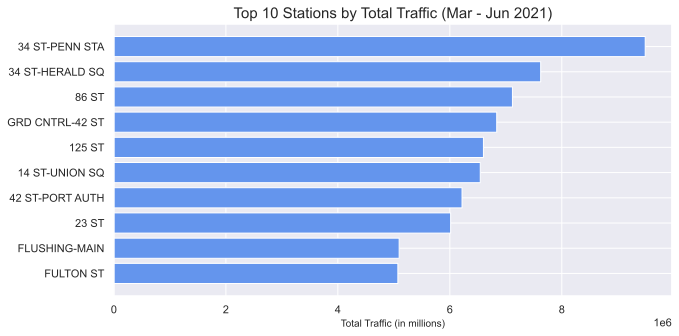

In [179]:
#total station traffic
plt.figure(figsize=(10,5))
plt.barh(y=daily_station_traffic_sorted['station'][:20], width=daily_station_traffic_sorted['traffic'][:20],color='cornflowerblue')
plt.xlabel("Total Traffic (in millions)", fontsize = 10)
plt.gca().invert_yaxis()
plt.title('Top 10 Stations by Total Traffic (Mar - Jun 2021)', fontsize = 15)
plt.savefig('10_busiest_stations.png', bbox_inches='tight', dpi=200, facecolor = 'w');

In [115]:
top_station_traffic_day["day_of_week"]=top_station_traffic_day["date"].dt.dayofweek

In [116]:
station_traffic_with_dates = station_daily_entries.merge(station_daily_exits, on = ["station","date"])
station_traffic_with_dates["traffic"] = station_traffic_each_day["daily_entries"]+station_traffic_each_day["daily_exits"]
# station_traffic_with_dates = station_traffic_each_day.sort_values("traffic",ascending=False).head(20)
# station_traffic_with_dates

In [60]:
station_traffic_with_dates["day_of_week"]=station_traffic_with_dates["date"].dt.dayofweek

In [61]:
station_traffic_with_dates

,station,date,daily_entries,daily_exits,traffic,day_of_week
0,34 ST-PENN STA,2021-06-21,118204.0,159691.0,277895.0,0
1,34 ST-PENN STA,2021-06-14,107303.0,138150.0,245453.0,0
2,34 ST-PENN STA,2021-06-07,106341.0,143533.0,249874.0,0
3,34 ST-PENN STA,2021-05-24,99278.0,136307.0,235585.0,0
4,34 ST-PENN STA,2021-05-17,94298.0,126986.0,221284.0,0
...,...,...,...,...,...,...
31751,ORCHARD BEACH,2021-06-23,0.0,0.0,0.0,2
31752,ORCHARD BEACH,2021-06-22,0.0,4.0,4.0,1
31753,ORCHARD BEACH,2021-06-18,0.0,0.0,0.0,4
31754,ORCHARD BEACH,2021-06-17,0.0,2.0,2.0,3


In [62]:
#AVERAGE TRAFFIC FOR STATIONS total traffic over timeframe #HELP HERE: WHY CANT I ALSO SORT BY DOW HERE?????
avg_daily_station_traffic = station_traffic_with_dates.groupby(["station"])[["traffic"]].mean().sort_values(by="traffic",ascending=False).reset_index()
avg_daily_station_traffic.sort_values("traffic",ascending=False,inplace=True)
avg_daily_station_traffic_PLOT = avg_daily_station_traffic.head(10)

In [63]:
avg_daily_station_traffic_PLOT

,station,traffic
0,34 ST-PENN STA,112972.976190
1,34 ST-HERALD SQ,90747.261905
2,86 ST,84742.273810
3,GRD CNTRL-42 ST,81404.011905
4,125 ST,78576.035714
5,14 ST-UNION SQ,77901.035714
6,42 ST-PORT AUTH,74023.738095
7,23 ST,71602.535714
8,FLUSHING-MAIN,60655.607143
9,FULTON ST,60381.988095


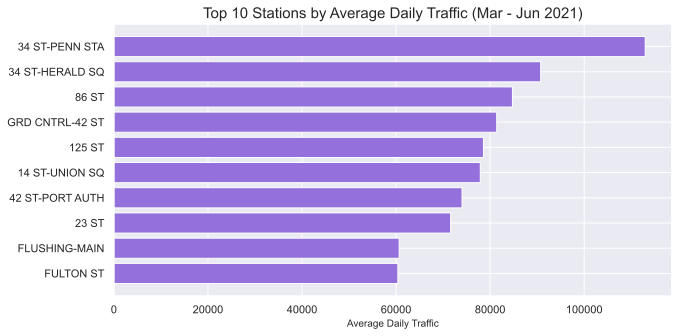

<Figure size 864x360 with 0 Axes>

In [143]:
#AVERAGE STATION STRAFFIC
plt.figure(figsize=(10,5))
plt.barh(avg_daily_station_traffic_PLOT.station, avg_daily_station_traffic_PLOT.traffic, color='mediumpurple')
plt.xlabel("Average Daily Traffic",fontsize = 10);
plt.gca().invert_yaxis()
plt.title('Top 10 Stations by Average Daily Traffic (Mar - Jun 2021)',fontsize = 15);
plt.show() 
plt.savefig('10_stations_avg_traffic.png', bbox_inches='tight', dpi=200, facecolor = 'w');

In [65]:
station_traffic_each_day

,station,date,daily_entries,daily_exits,traffic
0,34 ST-PENN STA,2021-06-21,118204.0,159691.0,277895.0
1,34 ST-PENN STA,2021-06-14,107303.0,138150.0,245453.0
2,34 ST-PENN STA,2021-06-07,106341.0,143533.0,249874.0
3,34 ST-PENN STA,2021-05-24,99278.0,136307.0,235585.0
4,34 ST-PENN STA,2021-05-17,94298.0,126986.0,221284.0
...,...,...,...,...,...
31751,ORCHARD BEACH,2021-06-23,0.0,0.0,0.0
31752,ORCHARD BEACH,2021-06-22,0.0,4.0,4.0
31753,ORCHARD BEACH,2021-06-18,0.0,0.0,0.0
31754,ORCHARD BEACH,2021-06-17,0.0,2.0,2.0


In [66]:
station_traffic_each_day
top_station_traffic_day["day_of_week"]=top_station_traffic_day["date"].dt.dayofweek

In [67]:
top_station_traffic_day

,station,date,daily_entries,daily_exits,traffic,day_of_week
0,34 ST-PENN STA,2021-06-21,118204.0,159691.0,277895.0,0
2,34 ST-PENN STA,2021-06-07,106341.0,143533.0,249874.0,0
1,34 ST-PENN STA,2021-06-14,107303.0,138150.0,245453.0,0
3,34 ST-PENN STA,2021-05-24,99278.0,136307.0,235585.0,0
4,34 ST-PENN STA,2021-05-17,94298.0,126986.0,221284.0,0
5,34 ST-HERALD SQ,2021-06-21,91729.0,127250.0,218979.0,0
6,34 ST-HERALD SQ,2021-06-14,89315.0,121045.0,210360.0,0
7,34 ST-PENN STA,2021-05-10,87853.0,121101.0,208954.0,0
9,34 ST-PENN STA,2021-04-26,83817.0,117834.0,201651.0,0
10,34 ST-PENN STA,2021-04-19,83793.0,117643.0,201436.0,0


In [68]:
#LOOKING AT  DATA: 34TH ST HERALD, 34TH ST PENN,86TH ST stations are the 3 most trafficked stations
most_trafficked_days = station_traffic_each_day[(station_traffic_each_day["station"] == "34 ST-PENN STA") |
                                       (station_traffic_each_day["station"] == "34 ST-HERALD SQ") |
                                       (station_traffic_each_day["station"] == "86 ST")]

# station_traffic.sort_values("traffic",ascending=False,inplace=True)
most_trafficked_days.head(10)

,station,date,daily_entries,daily_exits,traffic
0,34 ST-PENN STA,2021-06-21,118204.0,159691.0,277895.0
1,34 ST-PENN STA,2021-06-14,107303.0,138150.0,245453.0
2,34 ST-PENN STA,2021-06-07,106341.0,143533.0,249874.0
3,34 ST-PENN STA,2021-05-24,99278.0,136307.0,235585.0
4,34 ST-PENN STA,2021-05-17,94298.0,126986.0,221284.0
5,34 ST-HERALD SQ,2021-06-21,91729.0,127250.0,218979.0
6,34 ST-HERALD SQ,2021-06-14,89315.0,121045.0,210360.0
7,34 ST-PENN STA,2021-05-10,87853.0,121101.0,208954.0
8,34 ST-PENN STA,2021-05-03,84000.0,114763.0,198763.0
9,34 ST-PENN STA,2021-04-26,83817.0,117834.0,201651.0


In [69]:
most_trafficked_days["day_of_week"]=most_trafficked_days["date"].dt.dayofweek
most_trafficked_days['week_of_year'] = pd.to_datetime(most_trafficked_days['date']).dt.isocalendar().week

most_trafficked_days

<ipython-input-69-9ff39959fd87>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  most_trafficked_days["day_of_week"]=most_trafficked_days["date"].dt.dayofweek
<ipython-input-69-9ff39959fd87>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  most_trafficked_days['week_of_year'] = pd.to_datetime(most_trafficked_days['date']).dt.isocalendar().week


,station,date,daily_entries,daily_exits,traffic,day_of_week,week_of_year
0,34 ST-PENN STA,2021-06-21,118204.0,159691.0,277895.0,0,25
1,34 ST-PENN STA,2021-06-14,107303.0,138150.0,245453.0,0,24
2,34 ST-PENN STA,2021-06-07,106341.0,143533.0,249874.0,0,23
3,34 ST-PENN STA,2021-05-24,99278.0,136307.0,235585.0,0,21
4,34 ST-PENN STA,2021-05-17,94298.0,126986.0,221284.0,0,20
...,...,...,...,...,...,...,...
837,86 ST,2021-04-01,26854.0,33178.0,60032.0,3,13
852,86 ST,2021-06-01,26772.0,37099.0,63871.0,1,22
890,34 ST-HERALD SQ,2021-03-02,26454.0,32568.0,59022.0,1,9
894,86 ST,2021-03-30,26422.0,32300.0,58722.0,1,13


In [70]:
most_trafficked_days[(station_traffic_with_dates["station"] == "34 ST-PENN STA") |
                     (station_traffic_with_dates["station"] == "34 ST-HERALD SQ") |
                     (station_traffic_with_dates["station"] == "86 ST")].sort_values(["traffic"],ascending=False)

#THESE ARE THE DATES THAT ARE MOST TRAFFICKED
most_trafficked_days.head(10)

<ipython-input-70-21e7b5f5a9a0>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  most_trafficked_days[(station_traffic_with_dates["station"] == "34 ST-PENN STA") |


,station,date,daily_entries,daily_exits,traffic,day_of_week,week_of_year
0,34 ST-PENN STA,2021-06-21,118204.0,159691.0,277895.0,0,25
1,34 ST-PENN STA,2021-06-14,107303.0,138150.0,245453.0,0,24
2,34 ST-PENN STA,2021-06-07,106341.0,143533.0,249874.0,0,23
3,34 ST-PENN STA,2021-05-24,99278.0,136307.0,235585.0,0,21
4,34 ST-PENN STA,2021-05-17,94298.0,126986.0,221284.0,0,20
5,34 ST-HERALD SQ,2021-06-21,91729.0,127250.0,218979.0,0,25
6,34 ST-HERALD SQ,2021-06-14,89315.0,121045.0,210360.0,0,24
7,34 ST-PENN STA,2021-05-10,87853.0,121101.0,208954.0,0,19
8,34 ST-PENN STA,2021-05-03,84000.0,114763.0,198763.0,0,18
9,34 ST-PENN STA,2021-04-26,83817.0,117834.0,201651.0,0,17


In [71]:
mask = ((station_traffic_with_dates["station"] == "34 ST-PENN STA") |
        (station_traffic_with_dates["station"] == "34 ST-HERALD SQ") |
        (station_traffic_with_dates["station"] == "86 ST"))

In [72]:
top3 = station_traffic_with_dates[mask]
top3['week_of_year'] = pd.to_datetime(top3['date']).dt.isocalendar().week
top3.head()

<ipython-input-72-374bfeea2ce1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top3['week_of_year'] = pd.to_datetime(top3['date']).dt.isocalendar().week


,station,date,daily_entries,daily_exits,traffic,day_of_week,week_of_year
0,34 ST-PENN STA,2021-06-21,118204.0,159691.0,277895.0,0,25
1,34 ST-PENN STA,2021-06-14,107303.0,138150.0,245453.0,0,24
2,34 ST-PENN STA,2021-06-07,106341.0,143533.0,249874.0,0,23
3,34 ST-PENN STA,2021-05-24,99278.0,136307.0,235585.0,0,21
4,34 ST-PENN STA,2021-05-17,94298.0,126986.0,221284.0,0,20


In [73]:
top_three = top3.groupby(['station','day_of_week'])['traffic'].sum() \
    .reset_index() \
    .sort_values(['station', 'day_of_week'], ascending=False)
top_three

,station,day_of_week,traffic
14,86 ST,4,1210954.0
13,86 ST,3,1216534.0
12,86 ST,2,1174604.0
11,86 ST,1,1136859.0
10,86 ST,0,2379400.0
9,34 ST-PENN STA,4,1598907.0
8,34 ST-PENN STA,3,1566160.0
7,34 ST-PENN STA,2,1545159.0
6,34 ST-PENN STA,1,1504057.0
5,34 ST-PENN STA,0,3275447.0


In [145]:
plot3 = top_three.pivot("day_of_week","station", "traffic")
# days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plot3.head(7)

station,34 ST-HERALD SQ,34 ST-PENN STA,86 ST
day_of_week,,,
0,2658046.0,3275447.0,2379400.0
1,1194396.0,1504057.0,1136859.0
2,1240953.0,1545159.0,1174604.0
3,1249141.0,1566160.0,1216534.0
4,1280234.0,1598907.0,1210954.0


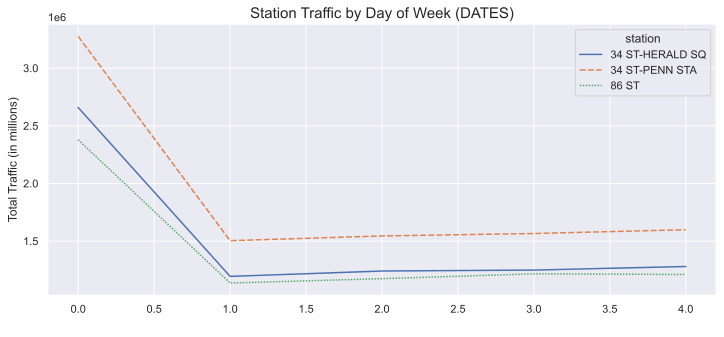

In [146]:
sns.lineplot(data = plot3)
sns.set(rc={'figure.figsize':(12,5)})
plt.xlabel(" ")
plt.ylabel("Total Traffic (in millions)", fontsize = 12)
plt.title('Station Traffic by Day of Week (DATES)', fontsize = 15);
# plt.savefig('Top Seven.png', bbox_inches='tight', dpi=200, facecolor = 'w');

In [148]:
#plot by week of year
top_3_WOY = top3.groupby(['station','week_of_year'])['traffic'].sum() \
    .reset_index() \
    .sort_values(['station', 'week_of_year'], ascending=False)
top_3_WOY.head()

,station,week_of_year,traffic
50,86 ST,25,492899.0
49,86 ST,24,503794.0
48,86 ST,23,489348.0
47,86 ST,22,427332.0
46,86 ST,21,473532.0


In [77]:
top_three_WOY = top_3_WOY.pivot("week_of_year","station", "traffic")
top_three_WOY.head(7)

station,34 ST-HERALD SQ,34 ST-PENN STA,86 ST
week_of_year,,,
9,244361.0,308306.0,242277.0
10,386130.0,477416.0,377862.0
11,374386.0,478477.0,366755.0
12,406361.0,500016.0,377264.0
13,414513.0,503039.0,373902.0
14,416246.0,510590.0,386769.0
15,415848.0,514780.0,403993.0


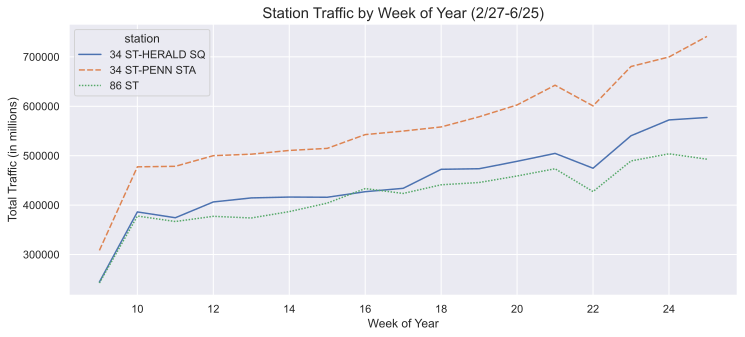

In [166]:
g = sns.lineplot(data = top_three_WOY)
sns.set(rc={'figure.figsize':(12,5)})
plt.xlabel("Week of Year")
plt.ylabel("Total Traffic (in millions)", fontsize = 12)
plt.title('Station Traffic by Week of Year (2/27-6/25)', fontsize = 15);
plt.savefig('3stations.png', bbox_inches='tight', dpi=200, facecolor = 'w');

In [79]:
station_daily_top_3 = station_traffic_each_day[mask]
daily_traffic_at_penn_sta = most_trafficked_days[(most_trafficked_days["station"] == "34 ST-PENN STA")].sort_values(["traffic"],ascending=False).head(5)
               # take mta station using mask                                               #^column to sort
daily_traffic_at_penn_sta

,station,date,daily_entries,daily_exits,traffic,day_of_week,week_of_year
0,34 ST-PENN STA,2021-06-21,118204.0,159691.0,277895.0,0,25
2,34 ST-PENN STA,2021-06-07,106341.0,143533.0,249874.0,0,23
1,34 ST-PENN STA,2021-06-14,107303.0,138150.0,245453.0,0,24
3,34 ST-PENN STA,2021-05-24,99278.0,136307.0,235585.0,0,21
4,34 ST-PENN STA,2021-05-17,94298.0,126986.0,221284.0,0,20


In [80]:
daily_traffic_at_herald_sq = most_trafficked_days[(most_trafficked_days["station"] == "34 ST-HERALD SQ")].sort_values(["traffic"],ascending=False).head()
               # take mta station using mask                                               #^column to sort
daily_traffic_at_herald_sq

,station,date,daily_entries,daily_exits,traffic,day_of_week,week_of_year
5,34 ST-HERALD SQ,2021-06-21,91729.0,127250.0,218979.0,0,25
6,34 ST-HERALD SQ,2021-06-14,89315.0,121045.0,210360.0,0,24
11,34 ST-HERALD SQ,2021-06-07,83601.0,114219.0,197820.0,0,23
14,34 ST-HERALD SQ,2021-05-24,77483.0,104926.0,182409.0,0,21
16,34 ST-HERALD SQ,2021-05-17,76292.0,104709.0,181001.0,0,20


In [81]:
daily_traffic_at_86_st = most_trafficked_days[(most_trafficked_days["station"] == "86 ST")].sort_values(["traffic"],ascending=False).head()
               # take mta station using mask                                               #^column to sort
daily_traffic_at_86_st

,station,date,daily_entries,daily_exits,traffic,day_of_week,week_of_year
24,86 ST,2021-06-14,74015.0,104475.0,178490.0,0,24
25,86 ST,2021-06-21,73167.0,100613.0,173780.0,0,25
28,86 ST,2021-06-07,72166.0,99785.0,171951.0,0,23
38,86 ST,2021-05-24,70075.0,95195.0,165270.0,0,21
39,86 ST,2021-04-19,69755.0,92968.0,162723.0,0,16


In [82]:
daily_station_traffic_sorted

,station,daily_entries,daily_exits,traffic
0,34 ST-PENN STA,4069796.0,5419934.0,9489730.0
1,34 ST-HERALD SQ,3329221.0,4293549.0,7622770.0
2,86 ST,3135189.0,3983162.0,7118351.0
4,GRD CNTRL-42 ST,2900207.0,3937730.0,6837937.0
3,125 ST,2944337.0,3656050.0,6600387.0
7,14 ST-UNION SQ,2798950.0,3744737.0,6543687.0
6,42 ST-PORT AUTH,2843336.0,3374658.0,6217994.0
5,23 ST,2846817.0,3167796.0,6014613.0
8,FLUSHING-MAIN,2422832.0,2672239.0,5095071.0
12,FULTON ST,2235579.0,2836508.0,5072087.0


In [83]:
#average traffic for all stations
plot_total_station_traffic= daily_station_traffic_sorted.groupby(["station"])["traffic"].mean().sort_values(ascending=False).reset_index()
plot_total_station_traffic

,station,traffic
0,34 ST-PENN STA,9489730.0
1,34 ST-HERALD SQ,7622770.0
2,86 ST,7118351.0
3,GRD CNTRL-42 ST,6837937.0
4,125 ST,6600387.0
5,14 ST-UNION SQ,6543687.0
6,42 ST-PORT AUTH,6217994.0
7,23 ST,6014613.0
8,FLUSHING-MAIN,5095071.0
9,FULTON ST,5072087.0


In [182]:
#average traffic per DOW for top 3 stations - most trafficked DOW
plot_avg_most_trafficked_dow_for_top3 = most_trafficked_days.groupby(["day_of_week"])["traffic"].mean().sort_values(ascending=False).reset_index()
plot_avg_most_trafficked_dow_for_top3
plot_avg_most_trafficked_dow_for_top3

,day_of_week,traffic
0,0,173185.270833
1,4,80197.941176
2,3,79055.588235
3,2,77661.098039
4,1,75202.196078


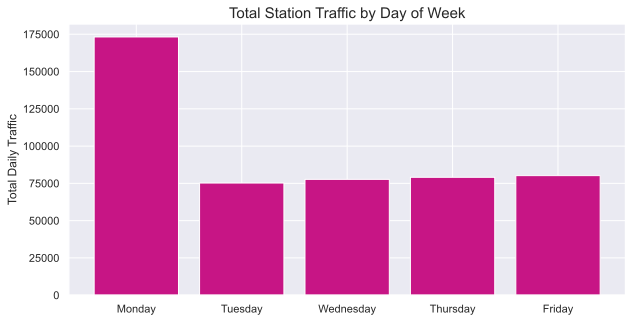

In [187]:
plt.figure(figsize=(10,5))
plt.bar(x=plot_avg_most_trafficked_dow_for_top3['day_of_week'], height=plot_avg_most_trafficked_dow_for_top3['traffic'],color="mediumvioletred")
plt.xticks([0,1,2,3,4], ['Monday', 'Tuesday', 'Wednesday',"Thursday", "Friday"],rotation=0)
plt.ylabel("Total Daily Traffic", fontsize = 12)
plt.title('Total Station Traffic by Day of Week', fontsize = 15)
plt.savefig('Busiest Days (Matplot).png', bbox_inches='tight', dpi=200, facecolor = 'w');

In [86]:
plot2 = most_trafficked_days.groupby(["week_of_year"],as_index = False)["traffic"].mean().sort_values(by = "traffic",ascending=False)
plot2

,week_of_year,traffic
16,25,120773.800000
15,24,118394.400000
14,23,114013.333333
12,21,108051.866667
11,20,103345.733333
13,22,100180.466667
10,19,99866.600000
9,18,98109.000000
8,17,93822.133333
7,16,93546.666667


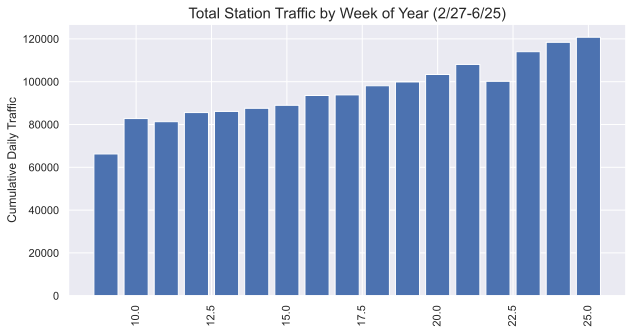

In [167]:
plt.figure(figsize=(10,5))
plt.bar(x=plot2['week_of_year'], height=plot2['traffic'])
plt.xticks(rotation=90)
plt.ylabel("Cumulative Daily Traffic", fontsize = 12)
plt.title('Total Station Traffic by Week of Year (2/27-6/25)', fontsize = 15)
plt.savefig('Busiest Days.png', bbox_inches='tight', dpi=200, facecolor = 'w');

In [89]:
most_trafficked_days['week_of_year'] = pd.to_datetime(most_trafficked_days['date']).dt.isocalendar().week
most_trafficked_days.head()

<ipython-input-89-c1ce54c6e79f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  most_trafficked_days['week_of_year'] = pd.to_datetime(most_trafficked_days['date']).dt.isocalendar().week


,station,date,daily_entries,daily_exits,traffic,day_of_week,week_of_year
0,34 ST-PENN STA,2021-06-21,118204.0,159691.0,277895.0,0,25
1,34 ST-PENN STA,2021-06-14,107303.0,138150.0,245453.0,0,24
2,34 ST-PENN STA,2021-06-07,106341.0,143533.0,249874.0,0,23
3,34 ST-PENN STA,2021-05-24,99278.0,136307.0,235585.0,0,21
4,34 ST-PENN STA,2021-05-17,94298.0,126986.0,221284.0,0,20


In [90]:
most_trafficked_days[(most_trafficked_days["station"] == "34 ST-PENN STA")|
                     (most_trafficked_days["station"] == "34 ST-HERALD SQ")|
                     (most_trafficked_days["station"] == "86 ST")].sort_values(["traffic"],ascending=False)

#THESE ARE THE DATES THAT ARE MOST TRAFFICKED
most_trafficked_days.head()

,station,date,daily_entries,daily_exits,traffic,day_of_week,week_of_year
0,34 ST-PENN STA,2021-06-21,118204.0,159691.0,277895.0,0,25
1,34 ST-PENN STA,2021-06-14,107303.0,138150.0,245453.0,0,24
2,34 ST-PENN STA,2021-06-07,106341.0,143533.0,249874.0,0,23
3,34 ST-PENN STA,2021-05-24,99278.0,136307.0,235585.0,0,21
4,34 ST-PENN STA,2021-05-17,94298.0,126986.0,221284.0,0,20


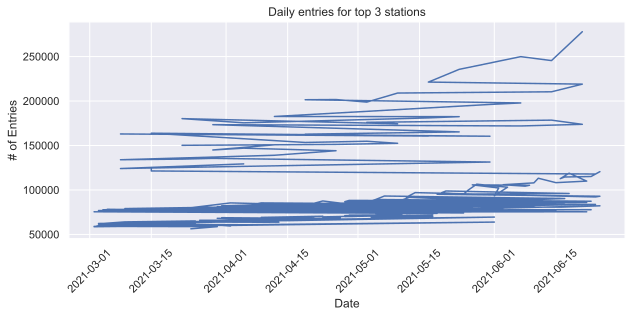

In [94]:
#LILY -- make a histogram instead
plt.figure(figsize=(10,4));
plt.plot(most_trafficked_days['date'], most_trafficked_days['traffic'])

#plt.plot(df[;(x axis), y axis)
plt.ylabel('# of Entries')
plt.xlabel('Date')
plt.xticks(rotation=45)  # rotate x ticks so looks pretty
plt.title('Daily entries for top 3 stations');
#make a punchy title that highlights insight
#alt title: Daily Entries Fluctuate Cyclically Based on DOW for Turnstile 

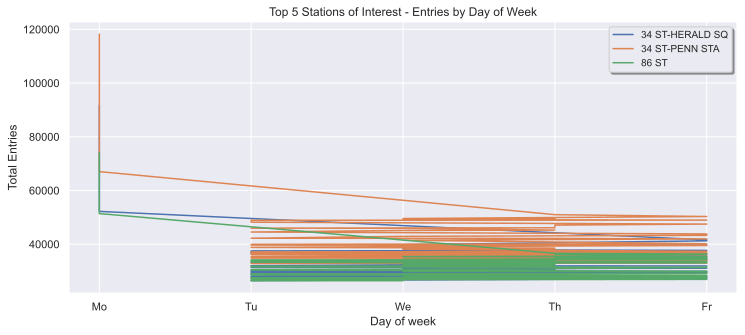

In [96]:
for i, group in most_trafficked_days.groupby('station'):
    plt.plot(group["day_of_week"], group["daily_entries"], label=i)

plt.legend(shadow=True, loc=0, fontsize= 'small')
plt.xlabel('Day of week')
plt.ylabel('Total Entries')
plt.xticks(np.arange(5),['Mo','Tu','We','Th','Fr'])
plt.title('Top 5 Stations of Interest - Entries by Day of Week');

plt.savefig('Top 5 Stations of interest - entries by day of week', bbox_inches = 'tight')

Text(0.5, 1.0, 'Daily traffic at herald sq')

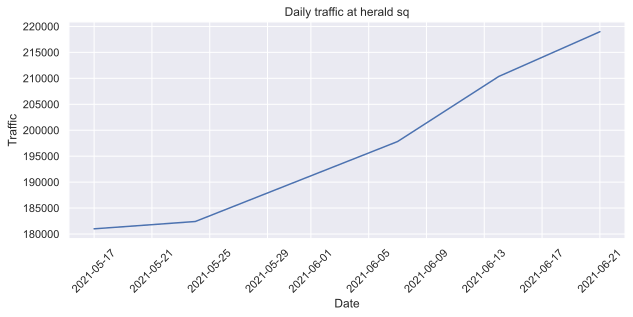

In [97]:
plt.figure(figsize=(10,4));
plt.plot(daily_traffic_at_herald_sq['date'], daily_traffic_at_herald_sq['traffic'])


#plt.plot(df[;(x axis), y axis)
plt.ylabel('Traffic')
plt.xlabel('Date')
plt.xticks(rotation=45)  # rotate x ticks so looks pretty
plt.title('Daily traffic at herald sq')

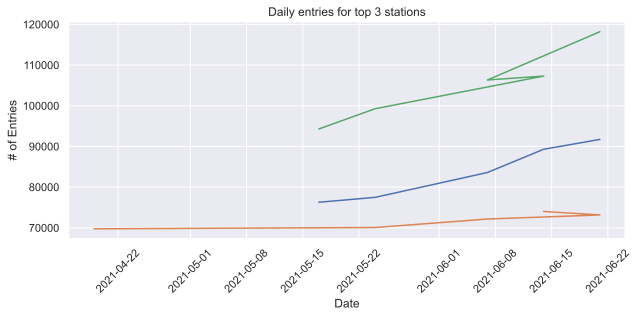

In [98]:
plt.figure(figsize=(10,4));
plt.plot(daily_traffic_at_herald_sq['date'], daily_traffic_at_herald_sq['daily_entries'])
plt.plot(daily_traffic_at_86_st['date'], daily_traffic_at_86_st['daily_entries'])
plt.plot(daily_traffic_at_penn_sta['date'], daily_traffic_at_penn_sta['daily_entries'])

#plt.plot(df[;(x axis), y axis)
plt.ylabel('# of Entries')
plt.xlabel('Date')
plt.xticks(rotation=45)  # rotate x ticks so looks pretty
plt.title('Daily entries for top 3 stations');
